# Microsoft Insights #

## Objective: ##
Microsoft has tasked us with figuring out what types of films are currently doing the best at the box office.

A database has been provided under as `movies.db`. We will use this dataset to make insights and visualizations that can help its shareholders make educated decisions about the type of movies that they are going to pursue.

We will start by importing all the necessary libraries to explore our dataset and visualize it:

In [83]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Exploring the Data

Transform the database into an easy to read `DataFrame` using the Pandas library.

Explore the data in the table `rotten_tomatoes_movies`.

In [84]:
conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()
cur.execute("""SELECT * FROM rotten_tomatoes_movies""")

rottenTomatoesMovies = pd.DataFrame(cur.fetchall())
rottenTomatoesMovies.columns = [x[0] for x in cur.description]
rottenTomatoesMovies

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.00,149.00,Spilled,53.00,254421.00,43,73,76
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified-Fresh,87.00,142.00,Upright,64.00,11574.00,44,123,19
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,67.00,24.00,Spilled,53.00,14684.00,2,16,8
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified-Fresh,100.00,54.00,Upright,97.00,105386.00,6,54,0
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89.00,27.00,Upright,74.00,68918.00,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,None,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",...,MCA Universal Home Video,Rotten,56.00,9.00,Upright,74.00,1195.00,2,5,4
17708,17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",...,Walt Disney Animation Studios,Certified-Fresh,98.00,291.00,Upright,92.00,101511.00,50,285,7
17709,17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,None,NR,"Action & Adventure, Art House & International,...",None,None,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",...,Fox,Fresh,80.00,10.00,Upright,86.00,7146.00,0,8,2
17710,17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",...,Paramount Pictures,Fresh,96.00,23.00,Upright,91.00,30193.00,6,22,1


Explore the data in `bom_movie_gross`.

In [85]:
cur.execute("""SELECT * FROM bom_movie_gross""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.00,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,3,Inception,WB,292600000.00,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...,...
3382,3382,The Quake,Magn.,6200.00,None,2018
3383,3383,Edward II (2018 re-release),FM,4800.00,None,2018
3384,3384,El Pacto,Sony,2500.00,None,2018
3385,3385,The Swan,Synergetic,2400.00,None,2018


## What production company produced the most movies in the decade? ## 

Select the name of the `Production Company` and the ` Count of Movies` from the table `rotten_tomatoes_movies` and ordering in descending order to view which `Production Comapny` takes on the most movie projects.

In [86]:
cur.execute("""SELECT production_company, count(movie_title) AS sum_of_movies FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               GROUP BY production_company
               ORDER BY sum_of_movies DESC
               LIMIT 5""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,production_company,sum_of_movies
0,Warner Bros. Pictures,109
1,20th Century Fox,109
2,Universal Pictures,105
3,IFC Films,91
4,Sony Pictures,76


It's time to visualize the above data in the DataFrame. To make it more presentable, a color scheme has been chosen to make it more visually appealing.

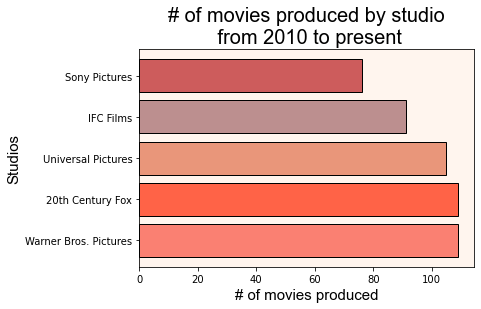

In [87]:
red_color_palette = ['salmon','tomato','darksalmon','rosybrown',
                     'indianred','brown','firebrick','darkred','maroon','red']

plt.barh(df.production_company, df['sum_of_movies'], edgecolor = 'black', color = red_color_palette)

plt.title('# of movies produced by studio\n from 2010 to present', fontname='arial', size=20)
plt.xlabel('# of movies produced', size=15, fontname='arial')
plt.ylabel('Studios', size=15, fontname ='arial')
plt.rcParams['axes.facecolor'] = 'seashell'
plt.savefig('num_of_movies_by_prod_com_bar.png')
plt.show()

# What studio generated the most income? #

The code below shows the total gross revenue domestically that each studio has generated in total starting from the year 2010 forward.

Note that the `pd.set_option('display.float_format', lambda x: '%.3f' % x)` is used to remove the scientific notation that pandas would normally format the large numbers by.

In [88]:
cur.execute("""SELECT studio, sum(domestic_gross) AS SUM, avg(domestic_gross) AS AVERAGE FROM bom_movie_gross
               JOIN rotten_tomatoes_movies
               ON bom_movie_gross.title = rotten_tomatoes_movies.movie_title
               WHERE year >= 2010
               GROUP BY studio
               ORDER BY SUM DESC
               LIMIT 10;""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.head()

,studio,SUM,AVERAGE
0,BV,15534080700.00,189440008.54
1,Uni.,12097022000.00,90276283.58
2,WB,9871000000.00,91398148.15
3,Fox,9429699998.00,83448672.55
4,Sony,7065690998.00,87230753.06


Now lets plot it in a bargraph to better compare the numbers earned in average and in total for each studio. Passing `plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)` allows the passing of the large numbers.

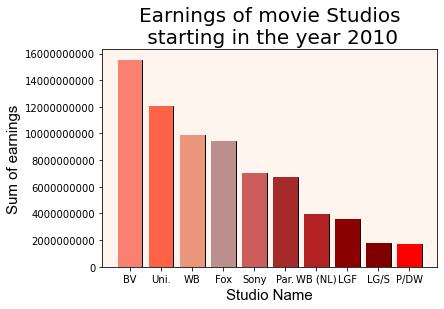

In [89]:
plt.bar(df.studio, df['SUM'], edgecolor = 'black')

y_pos = np.arange(len(df.studio))
height = df['SUM']
plt.xlabel('Studio Name', size=15, fontname = "arial")
plt.ylabel('Sum of earnings', size = 15, fontname = 'arial')
plt.title('Earnings of movie Studios\n starting in the year 2010', size=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


plt.bar(y_pos, height, color= red_color_palette)
plt.savefig('Top_Ten_Studio_Domestic_Gross.png')
plt.show()

# Find the directors that averaged the most gross #

Use the table `rotten_tomatoes_movies` and `bom_movie_gross` and assgined to DataFrame **df_director**, apply some data cleaning and select the directors that averaged the most gross domestically.

In [90]:
cur.execute("""SELECT directors, count(directors) AS total_movies, 
               avg(domestic_gross) AS average_gross_by_director, genres, max(tomatometer_rating) AS max_rating
               FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               GROUP BY directors
               ORDER BY average_gross_by_director DESC""")

df_director = pd.DataFrame(cur.fetchall())
df_director.columns = [x[0] for x in cur.description]

df_director = df_director.dropna()
df_director

,directors,total_movies,average_gross_by_director,genres,max_rating
0,Anthony Russo,2,543450000.00,"Action & Adventure, Science Fiction & Fantasy",91.00
1,"Andrew Stanton, Angus MacLane",1,486300000.00,Animation,94.00
2,Joss Whedon,1,459000000.00,"Action & Adventure, Science Fiction & Fantasy",76.00
3,Lee Unkrich,1,415000000.00,"Animation, Comedy, Kids & Family",98.00
4,Patty Jenkins,1,412600000.00,"Action & Adventure, Drama, Science Fiction & F...",93.00
...,...,...,...,...,...
1503,Ian Fitzgibbon,1,800.00,"Action & Adventure, Comedy, Drama, Mystery & S...",56.00
1504,Alan Black,1,800.00,Action & Adventure,59.00
1505,Petter Naess,1,700.00,"Action & Adventure, Art House & International,...",45.00
1506,Franck Khalfoun,1,700.00,"Horror, Mystery & Suspense",30.00


It is time to visualize it. To keep it in theme, we will use the same color palette.

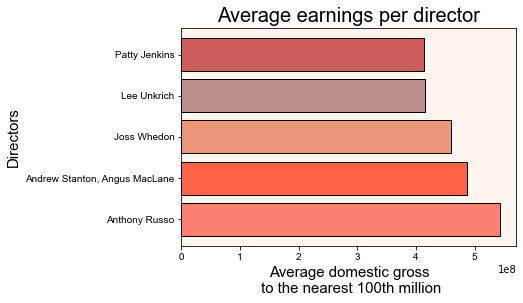

In [91]:
plt.barh(df_director.directors[:5], df_director['average_gross_by_director'][:5], 
         color=red_color_palette, edgecolor='black')

plt.yticks(size = 10, fontname='arial')
plt.xlabel('Average domestic gross\n to the nearest 100th million', size = 15, fontname='arial')
plt.xticks(size = 10, fontname='arial')
plt.ylabel('Directors', size = 15, fontname = 'arial')
plt.title('Average earnings per director', size=20, fontname = 'arial')
plt.savefig("earnings_per_director_bar.png")
plt.show()

Now let's see some correlations between our data. We will use it to see if a certain movie metric has a significant impact in the earnings that the movie gains while in the boxoffice domestically. 
We will do this by defining the function `check_correlation` that will check the correlation coefficient of the gross and a desired metric and will return a statement that indicates if there is a correlation or not.

In [92]:
def check_correlation(x,y):
    correlation = x.corr(y)
    if correlation == 1:
        return 'There is a strong positive correlation'
    elif correlation > .2:
        return 'There is a positive correlation'
    elif correlation <= .2:
        return 'There is a weak positive correlation'
    elif correlation == 0:
        return "There is no correlation"
    else:
        return 'There is a negative correlation'

Now, we will visualize it and use our defined function to check for correlation.

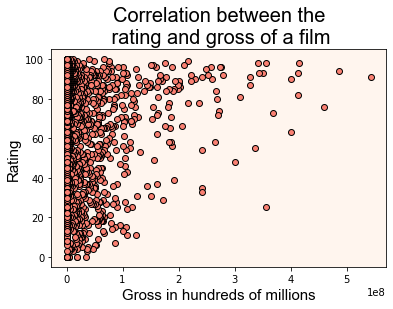

'There is a weak positive correlation'

In [93]:
averageRating = df_director.max_rating
averageGross = df_director.average_gross_by_director

plt.scatter(averageGross,averageRating, edgecolors='black', color = 'salmon')
plt.ylabel('Rating', size=15, fontname ='arial')
plt.xlabel('Gross in hundreds of millions', size=15, fontname='arial')
plt.title('Correlation between the\n rating and gross of a film', size= 20, fontname ='arial')
plt.savefig('correlation_rating_gross.png')
plt.show()

check_correlation(averageRating, averageGross)

There appears to be a "weak positive correlation". Because the correlation coefficient appears to be so low, it is likely that the rating of a movie does not have a vital role in the gross of a movie.

## Correlation between `Runtime` and `Domestic Gross` ##

Now we want to see the correlation between Runtime and Domestic Gross. For that we will select the `movie_title` data, its `runtime`, and its `domestic_gross`.
Let's create `df_runtime` that houses the data that we are looking for.

In [94]:
cur.execute("""SELECT movie_title, runtime, domestic_gross FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               ORDER BY domestic_gross DESC""")
df_runtime = pd.DataFrame(cur.fetchall())
df_runtime.columns = [x[0] for x in cur.description]
df_runtime.head()

,movie_title,runtime,domestic_gross
0,Black Panther,134.00,700100000.00
1,Avengers: Infinity War,149.00,678800000.00
2,Jurassic World,124.00,652300000.00
3,Marvel's The Avengers,143.00,623400000.00
4,Star Wars: The Last Jedi,152.00,620200000.00


In [95]:
def ret_metrics(x):
    return df_runtime[x][:10].mean(), df_runtime[x][:10].max(), df_runtime[x][:10].median(), df_runtime[x][:10].mean(), df_runtime[x][:10].min()

ret_metrics('runtime')

(136.3, 165.0, 137.5, 136.3, 103.0)

Time to visualize it, keeing it in theme!

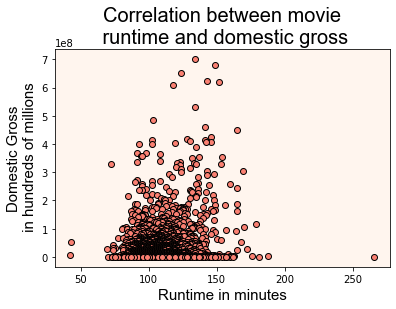

'There is a positive correlation'

In [96]:
runtime = df_runtime['runtime']
grossByRuntime = df_runtime['domestic_gross']

plt.scatter(runtime, grossByRuntime, edgecolor='black', color = 'salmon')
plt.title('Correlation between movie\n runtime and domestic gross', size= 20, fontname='arial')
plt.xlabel('Runtime in minutes', size= 15, fontname='arial')
plt.ylabel('Domestic Gross\n in hundreds of millions', size = 15, fontname = 'arial')
plt.savefig('Correlation_runtime_gross.png')
plt.show()
check_correlation(runtime,grossByRuntime)

It appears that there is a positive correlation between Domestic Gross and its Runtime, with the `average` runtime being of 136 minutes, the `minimum` runtime being 103 minutes, and the `max` runtime being of 165 minutes.

## What genre generated the most gross ##

Let's create our DataFrame `df_genres` that calls for the genres and the sum of the domestic gross.

In [97]:
cur.execute("""SELECT genres, sum(domestic_gross) AS total_gross
               FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               GROUP BY genres
               ORDER BY total_gross DESC""")

df_genres = pd.DataFrame(cur.fetchall())
df_genres.columns = [x[0] for x in cur.description]
df_genres.head()

,genres,total_gross
0,"Action & Adventure, Science Fiction & Fantasy",9162286999.00
1,Comedy,7536644198.00
2,"Action & Adventure, Drama, Science Fiction & F...",6356199999.00
3,Drama,5799617297.00
4,"Animation, Comedy, Kids & Family",3513100000.00


Now let's visualize and compare.

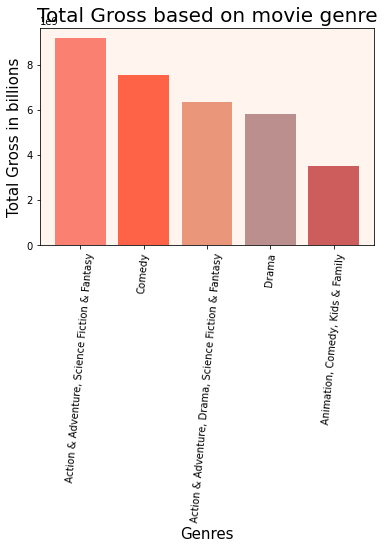

In [98]:
plt.bar(df_genres['genres'][:5], df_genres['total_gross'][:5], color = red_color_palette)
plt.title('Total Gross based on movie genre', size = 20)
plt.xticks(rotation = 85, size = 10)
plt.yticks(size = 10)
plt.xlabel('Genres', size = 15)
plt.ylabel('Total Gross in billions', size=15)
plt.savefig('top_genres_bar.png')
plt.show()